<a href="https://colab.research.google.com/github/kj824/Final-Team2/blob/main/%ED%8C%8C%EC%9D%B4%EB%84%90%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_2%ED%8C%80_%EA%B3%A0%EA%B2%BD%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 가설 : 숙소 유형에 따라 평점 수준, 리뷰 수, 평점 분산에 차이가 있을 것이다.

## 데이터 불러오기

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/combined_dataset.csv")

In [5]:
%%capture
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

## 데이터 확인 및 결측치 제거

In [6]:
#리뷰 수
df['number_of_reviews'].value_counts()

,count
number_of_reviews,
0,1497
1,654
2,536
3,403
5,293
...,...
355,1
541,1
634,1


In [7]:
df['number_of_reviews'].describe()

,number_of_reviews
count,11446.000000
mean,59.958850
std,99.617144
min,0.000000
25%,3.000000
50%,18.000000
75%,70.000000
max,1801.000000


In [8]:
df['number_of_reviews'].isna().sum()

np.int64(0)

In [9]:
df['review_scores_rating'].isna(). sum()

np.int64(1495)

In [10]:
#nan값, 0점 제거
df_clean = df[
    (df["review_scores_rating"].notna()) &
    (df["review_scores_rating"] > 0)
].copy()

In [11]:
df['number_of_reviews'].describe()

,number_of_reviews
count,11446.000000
mean,59.958850
std,99.617144
min,0.000000
25%,3.000000
50%,18.000000
75%,70.000000
max,1801.000000


## 숙소 유형 (영어 -> 한국어) 매핑

In [12]:
type_map_kr = {
    # 호텔 (3)
    "Room in hotel": "호텔 객실",
    "Room in boutique hotel": "부티크 호텔 객실",
    "Shared room in hotel": "호텔 다인실",

    # 호스텔 (3)
    "Room in hostel": "호스텔 객실",
    "Private room in hostel": "호스텔 개인실",
    "Shared room in hostel": "호스텔 다인실",

    # 아파트/콘도 (8)
    "Entire serviced apartment": "서비스드 아파트 전체",
    "Room in serviced apartment": "서비스드 아파트 객실",
    "Private room in serviced apartment": "서비스드 아파트 개인실",
    "Shared room in serviced apartment": "서비스드 아파트 다인실",
    "Room in aparthotel": "아파트형 호텔 객실",
    "Entire condo": "콘도 전체",
    "Private room in condo": "콘도 개인실",
    "Shared room in condo": "콘도 다인실",

    # 가정집 (17)
    "Entire rental unit": "숙소 전체",
    "Private room in rental unit": "독립된 개인 방",
    "Private room in home": "주택 내 개인실",
    "Shared room in home": "주택 내 다인실",
    "Entire home": "주택 전체",
    "Private room in townhouse": "연립주택 개인실",
    "Entire townhouse": "연립주택 전체",
    "Shared room in rental unit": "임대 주거 공간 다인실",
    "Private room in villa": "빌라 개인실",
    "Private room": "개인실",
    "Entire home/apt": "주택/아파트 전체",
    "Private room in vacation home": "휴가용 주택 개인실",
    "Entire vacation home": "휴가용 주택 전체",
    "Private room in loft": "로프트 개인실",
    "Entire loft": "로프트 전체",
    "Shared room in loft": "로프트 다인실",
    "Entire villa": "빌라 전체",

    # 게스트하우스 (5)
    "Entire guesthouse": "게스트하우스 전체",
    "Private room in guesthouse": "게스트하우스 개인실",
    "Shared room in guesthouse": "게스트하우스 다인실",
    "Entire guest suite": "게스트 스위트룸 전체",
    "Private room in guest suite": "게스트 스위트룸 개인실",

    # 민박집 (7)
    "Shared room in bed and breakfast": "민박집 다인실",
    "Private room in bed and breakfast": "민박집 개인실",
    "Entire bed and breakfast": "민박집 전체",
    "Room in bed and breakfast": "민박집 객실",
    "Farm stay": "농가민박 전체",
    "Private room in farm stay": "농가민박 개인실",
    "Private room in pension": "펜션 개인실",

    # 별장 (6)
    "Entire cottage": "전원주택 전체",
    "Entire chalet": "산간 별장 전체",
    "Entire cabin": "산장 전체",
    "Private room in cabin": "산장 개인실",
    "Entire bungalow": "방갈로 전체",
    "Tiny home": "소형 주택",

    # 이색 숙소 (16)
    "Houseboat": "하우스보트",
    "Boat": "보트",
    "Private room in boat": "보트 개인실",
    "Camper/RV": "캠핑카/카라반",
    "Private room in camper/rv": "캠핑카 개인실",
    "Dome": "돔형 숙소",
    "Private room in dome": "돔형 숙소 개인실",
    "Hut": "오두막",
    "Tent": "텐트",
    "Yurt": "유르트",
    "Private room in castle": "성 내부 개인실",
    "Private room in tower": "탑 내부 개인실",
    "Private room in casa particular": "카사 파르티쿨라르 개인실",
    "Cave": "동굴 숙소",
    "Private room in earthen home": "흙집 개인실",
    "Barn": "헛간 개조 숙소"
}
df_clean = df.copy()  # 원본 복사해서 df_clean 만들기

df_clean["property_type_kr"] = df_clean["property_type"].map(type_map_kr)

## 숙소 유형 top5 뽑아내기

In [13]:
# 리뷰 수 기준 상위 5개 숙소 유형 선택
top5_types = df_clean["property_type_kr"].value_counts().nlargest(5).index

# 해당 숙소 유형만 필터링
df_top5 = df_clean[df_clean["property_type_kr"].isin(top5_types)]

print(df_top5["property_type_kr"].value_counts())

property_type_kr
숙소 전체          6500
독립된 개인 방       1229
콘도 전체          1022
서비스드 아파트 전체     896
호텔 객실           282
Name: count, dtype: int64


/tmp/ipython-input-2006254842.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["review_scores_rating"] * x["number_of_reviews"]).sum()


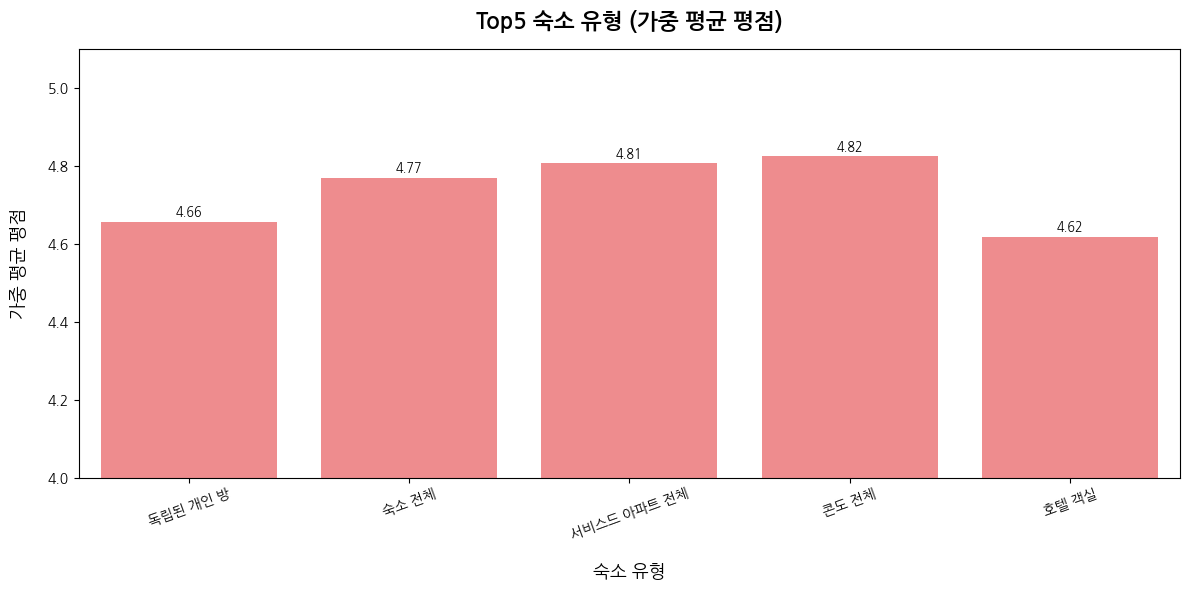

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------
# 데이터 집계: 숙소 유형별 가중 평균 평점 + 리뷰 수 평균
# -------------------------------
weighted_top5 = (
    df_top5.groupby("property_type_kr")
    .apply(lambda x: (x["review_scores_rating"] * x["number_of_reviews"]).sum()
                     / x["number_of_reviews"].sum())
    .reset_index(name="weighted_avg_rating")
)

review_mean = (
    df_top5.groupby("property_type_kr")["number_of_reviews"]
    .mean()
    .reset_index(name="review_mean")
)

# merge
weighted_top5 = pd.merge(weighted_top5, review_mean, on="property_type_kr")

# -------------------------------
# 시각화
# -------------------------------
fig, ax1 = plt.subplots(figsize=(12,6))

# 원하는 순서 지정
type_order = ["독립된 개인 방", "숙소 전체", "서비스드 아파트 전체", "콘도 전체", "호텔 객실"]

# 막대그래프: 가중 평균 평점
sns.barplot(
    data=weighted_top5,
    x="property_type_kr", y="weighted_avg_rating",
    order=type_order,
    color="#FF5A5F", alpha=0.8, ax=ax1
)

ax1.set_title("Top5 숙소 유형 (가중 평균 평점)", fontsize=16, pad=15, fontweight="bold")
ax1.set_ylabel("가중 평균 평점", fontsize=13, labelpad=15)
ax1.set_xlabel("숙소 유형", fontsize=13, labelpad=15)
ax1.set_ylim(4.0, 5.1)
ax1.tick_params(axis='x', rotation=20)

# 막대 위에 수치 표시
for container in ax1.containers:
    ax1.bar_label(container, fmt="%.2f", fontsize=9, padding=2)

plt.tight_layout()
plt.show()


## 숙소 유형 카테고리 매핑

In [15]:
# 숙소 유형 → 카테고리 매핑
category_map = {
    # 호텔 (3)
    "Room in hotel": "호텔",
    "Room in boutique hotel": "호텔",
    "Shared room in hotel": "호텔",

    # 호스텔 (3)
    "Room in hostel": "호스텔",
    "Private room in hostel": "호스텔",
    "Shared room in hostel": "호스텔",

    # 아파트/콘도 (8)
    "Entire serviced apartment": "아파트/콘도",
    "Room in serviced apartment": "아파트/콘도",
    "Private room in serviced apartment": "아파트/콘도",
    "Shared room in serviced apartment": "아파트/콘도",
    "Room in aparthotel": "아파트/콘도",
    "Entire condo": "아파트/콘도",
    "Private room in condo": "아파트/콘도",
    "Shared room in condo": "아파트/콘도",

    # 가정집 (17)
    "Entire rental unit": "가정집",
    "Private room in rental unit": "가정집",
    "Private room in home": "가정집",
    "Entire home": "가정집",
    "Private room in townhouse": "가정집",
    "Entire townhouse": "가정집",
    "Shared room in rental unit": "가정집",
    "Private room in villa": "가정집",
    "Private room": "가정집",
    "Entire home/apt": "가정집",
    "Private room in vacation home": "가정집",
    "Entire vacation home": "가정집",
    "Private room in loft": "가정집",
    "Entire loft": "가정집",
    "Shared room in loft": "가정집",
    "Shared room in home": "가정집",
    "Entire villa": "가정집",

    # 게스트하우스 (5)
    "Entire guesthouse": "게스트하우스",
    "Private room in guesthouse": "게스트하우스",
    "Shared room in guesthouse": "게스트하우스",
    "Entire guest suite": "게스트하우스",
    "Private room in guest suite": "게스트하우스",

    # 민박집 (7)
    "Shared room in bed and breakfast": "민박집",
    "Private room in bed and breakfast": "민박집",
    "Entire bed and breakfast": "민박집",
    "Room in bed and breakfast": "민박집",
    "Farm stay": "민박집",
    "Private room in farm stay": "민박집",
    "Private room in pension": "민박집",

    # 별장 (6)
    "Entire cottage": "별장",
    "Entire chalet": "별장",
    "Entire cabin": "별장",
    "Private room in cabin": "별장",
    "Entire bungalow": "별장",
    "Tiny home": "별장",

    # 이색 숙소 (16)
    "Houseboat": "이색 숙소",
    "Boat": "이색 숙소",
    "Private room in boat": "이색 숙소",
    "Camper/RV": "이색 숙소",
    "Private room in camper/rv": "이색 숙소",
    "Dome": "이색 숙소",
    "Private room in dome": "이색 숙소",
    "Hut": "이색 숙소",
    "Tent": "이색 숙소",
    "Yurt": "이색 숙소",
    "Private room in castle": "이색 숙소",
    "Private room in tower": "이색 숙소",
    "Private room in casa particular": "이색 숙소",
    "Cave": "이색 숙소",
    "Private room in earthen home": "이색 숙소",
    "Barn": "이색 숙소"
}

# 매핑 적용
df_clean["property_category"] = df_clean["property_type"].map(category_map)
df["property_category"] = df["property_type"].map(category_map)

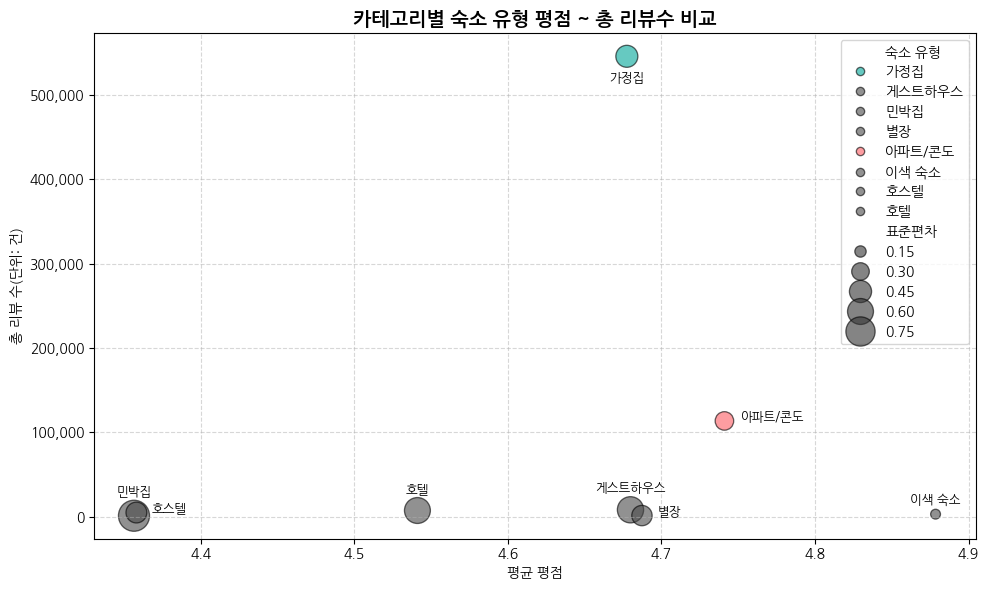

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick

# 숙소 유형별 통계 집계
stats = df_clean.groupby("property_category")["review_scores_rating"].agg(["mean", "std"]).reset_index()
review_sum = df_clean.groupby("property_category")["number_of_reviews"].sum().reset_index(name="review_sum")

# 병합
stats = stats.merge(review_sum, on="property_category")

# ✅ 컬럼명 한글화
stats = stats.rename(columns={
    "property_category": "숙소 유형",
    "std": "표준편차"
})

# ---------------------------------
# 🔹 팔레트 지정 (색상만 수정)
# ---------------------------------
custom_palette = {
    "아파트/콘도": "#fc5c62",  # 빨강
    "가정집": "#00a699",      # 청록
}
# 나머지 유형은 회색으로
unique_types = stats["숙소 유형"].unique()
for t in unique_types:
    if t not in custom_palette:
        custom_palette[t] = "#484848"

# 버블 차트 (총 리뷰 수 사용)
plt.figure(figsize=(10,6))
ax = sns.scatterplot(
    data=stats,
    x="mean", y="review_sum",
    size="표준편차", hue="숙소 유형",
    palette=custom_palette,
    sizes=(50, 500), alpha=0.6, edgecolor="k"
)

# ✅ y축 천 단위 표시
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

# 값 표시 (숙소 이름)
for i, row in stats.iterrows():
    if row["숙소 유형"] == "가정집":
        plt.text(row["mean"], row["review_sum"] - 30000, "가정집",
                 ha="center", fontsize=9, color="black")
    elif row["숙소 유형"] == "아파트/콘도":
        plt.text(row["mean"] + 0.01, row["review_sum"], "아파트/콘도",
                 ha="left", fontsize=9, color="black")
    elif row["숙소 유형"] == "호텔":
        plt.text(row["mean"], row["review_sum"] + 21000, "호텔",
                 ha="center", fontsize=9, color="black")
    elif row["숙소 유형"] == "이색 숙소":
        plt.text(row["mean"], row["review_sum"] + 12000, "이색 숙소",
                 ha="center", fontsize=9, color="black")
    elif row["숙소 유형"] == "게스트하우스":
        plt.text(row["mean"], row["review_sum"] + 21000, "게스트하우스",
                 ha="center", fontsize=9, color="black")
    elif row["숙소 유형"] == "별장":
        plt.text(row["mean"] + 0.01, row["review_sum"], "별장",
                 ha="left", fontsize=9, color="black")
    elif row["숙소 유형"] == "민박집":
        plt.text(row["mean"], row["review_sum"] + 23000, "민박집",
                 ha="center", fontsize=9, color="black")
    elif row["숙소 유형"] == "호스텔":
        plt.text(row["mean"] + 0.01, row["review_sum"], "호스텔",
                 ha="left", fontsize=9, color="black")
    else:
        plt.text(row["mean"], row["review_sum"] + 5000, row["숙소 유형"],
                 ha="center", fontsize=9, color="black")

plt.title("카테고리별 숙소 유형 평점 ~ 총 리뷰수 비교", fontsize=14, fontweight="bold")
plt.xlabel("평균 평점")
plt.ylabel("총 리뷰 수(단위: 건)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
